# Project 2: Group 1: Predicting Housing Prices


### Group Members:


In [68]:
print  ("Jessica Lozano")
print ("Joeseph Perri")
print ("Marc-tabin") 
print ("Nesreen El-Rayes")

Jessica Lozano
Joeseph Perri
Marc-tabin
Nesreen El-Rayes


## Objective:

The objective of the project is to predict the price of houes based on different features.  The data set is "Ames Housing Data Set".

"The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset."

The Data set is compose of 81 Features (Excluding the Target Variable: Price of House), and 2919 records. The features varies between quantitative and qualitative variables and the objective is to find the features that best help predicting the Sales Price of a house(Target).


## Libraries Use:

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn import model_selection, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
from scipy import stats
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Lasso, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_regression

ImportError: No module named graphviz

## Data Description:

In [70]:
myfile=open("example.txt") 
txt = myfile.read()
print(txt)

''''
Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof

## Data Cleaning and Preparation:

Each feature is supposed to have 2919 values, the features that have more than 2000 null 
cells were excluded. Out of the 79 features, 4 columns had this case, which are: 'Alley','PoolQC','Fence','MiscFeature'.

The output below shows a sample of the first 6 records across the features.


In [71]:
raw_df = pd.read_csv('housingdata.csv')
raw_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
raw_df.dropna(inplace=True)

print(raw_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
1    AllPub       FR2    ...                 0         0           0        0   
2    AllPub    Inside    ...                 0         0           0        0   
3    AllPub    Corner    ...               272         0           0        0   
4    AllPub       FR2    ...                 0         0           0        0   
6    AllPub    Inside    ...                 0         0           0        0   

  MiscVal MoSold  Soldfrom  Sale

### Null Values:

The output below shows the nulls were removed from all the features.

In [72]:
print(raw_df.isnull().sum(axis=0))


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

# Visualization

The following section includes charts that gives further viual representation for the data set.
The charts included below are:
1. Bar Chart
2. Histogram
3. Scatter Plot
4. Heat Map
5. Violin Plot

The function below counts the frequency for the Chars.

In [73]:
def col_count_plot(col):
    data = raw_df[col]
    names = data.value_counts().index
    values = data.value_counts().values
    pos = range(len(values))
    plt.bar(pos, values)
    plt.xticks(pos, names)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

#### Bar Chart:

Grliv Ar: Above grade (ground) living area square feet


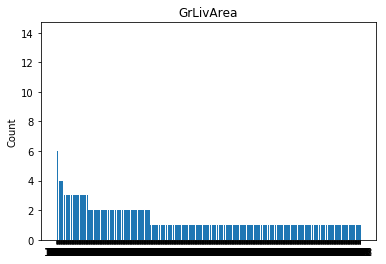

OverallQual: Rates the overall material and finish of the house


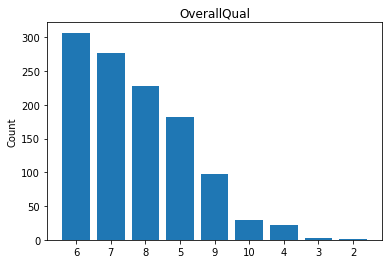

Garage Cars Capacity


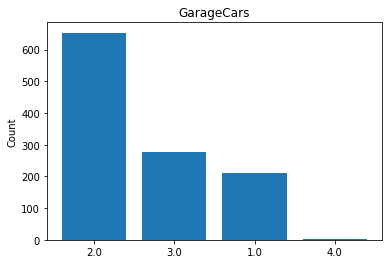

Total Rooms above Grade without Bathroom


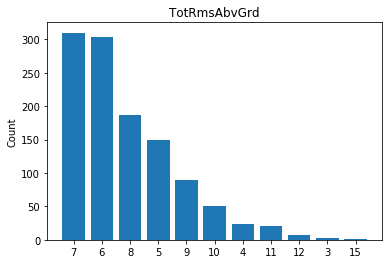

In [74]:
#bar charts
print ('Grliv Ar: Above grade (ground) living area square feet')
col_count_plot('GrLivArea') 

print ('OverallQual: Rates the overall material and finish of the house')
col_count_plot('OverallQual') 

print ('Garage Cars Capacity')
col_count_plot('GarageCars')

print ('Total Rooms above Grade without Bathroom')
col_count_plot('TotRmsAbvGrd')

#### Histogram:

In [ ]:
The histogram shows the distribution of prices of houses.

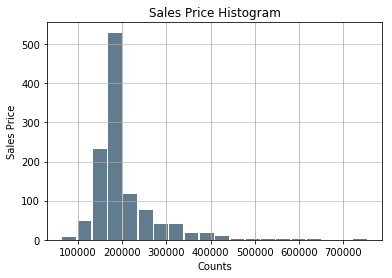

In [45]:
#histogram chart
raw_df.iloc[:,76].hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Sales Price Histogram')
plt.xlabel('Counts')
plt.ylabel('Sales Price')
plt.grid(axis='y', alpha=0.75)

#### Scatter Diagram:

Scatter Plot shows the correlation between the year where the house was built and the price. 
It shows that the data set has more data points for houses built in the last 50 years. 


Text(0,0.5,'Sale Price')

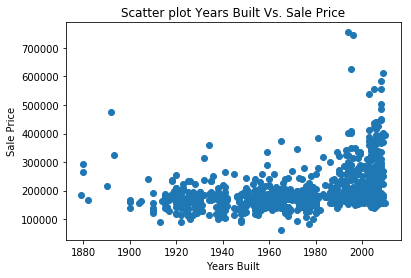

In [9]:
plt.scatter(raw_df['YearBuilt'],raw_df['SalePrice'])
plt.title('Scatter plot Years Built Vs. Sale Price')
plt.xlabel('Years Built')
plt.ylabel('Sale Price')

# Coding Categorical Data
# Marc Edit

In [82]:
#print(raw_df.dtypes) 
#shows all types of each attribute

raw_df['MSZoning'] = raw_df['MSZoning'].astype('category')
raw_df['Street'] = raw_df['Street'].astype('category')
raw_df['LotShape'] = raw_df['LotShape'].astype('category')
raw_df['LandContour'] = raw_df['LandContour'].astype('category')
raw_df['Utilities'] = raw_df['Utilities'].astype('category')
raw_df['LotConfig'] = raw_df['LotConfig'].astype('category')
raw_df['LandSlope'] = raw_df['LandSlope'].astype('category')
raw_df['Neighborhood'] = raw_df['Neighborhood'].astype('category')
raw_df['Condition1'] = raw_df['Condition1'].astype('category')
raw_df['Condition2'] = raw_df['Condition2'].astype('category')
raw_df['BldgType'] = raw_df['BldgType'].astype('category')
raw_df['HouseStyle'] = raw_df['HouseStyle'].astype('category')
raw_df['RoofStyle'] = raw_df['RoofStyle'].astype('category')
raw_df['RoofMatl'] = raw_df['RoofMatl'].astype('category')
raw_df['Exterior1st'] = raw_df['Exterior1st'].astype('category')
raw_df['Exterior2nd'] = raw_df['Exterior2nd'].astype('category')
raw_df['MasVnrType'] = raw_df['MasVnrType'].astype('category')
raw_df['ExterQual'] = raw_df['ExterQual'].astype('category')
raw_df['ExterCond'] = raw_df['ExterCond'].astype('category')
raw_df['Foundation'] = raw_df['Foundation'].astype('category')
raw_df['BsmtQual'] = raw_df['BsmtQual'].astype('category')
raw_df['BsmtCond'] = raw_df['BsmtCond'].astype('category')
raw_df['BsmtExposure'] = raw_df['BsmtExposure'].astype('category')
raw_df['BsmtFinType1'] = raw_df['BsmtFinType1'].astype('category')
raw_df['BsmtFinType2'] = raw_df['BsmtFinType2'].astype('category')
raw_df['Heating'] = raw_df['Heating'].astype('category')
raw_df['HeatingQC'] = raw_df['HeatingQC'].astype('category')
raw_df['CentralAir'] = raw_df['CentralAir'].astype('category')
raw_df['Electrical'] = raw_df['Electrical'].astype('category')
raw_df['KitchenQual'] = raw_df['KitchenQual'].astype('category')
raw_df['Functional'] = raw_df['Functional'].astype('category')
raw_df['FireplaceQu'] = raw_df['FireplaceQu'].astype('category')
raw_df['GarageType'] = raw_df['GarageType'].astype('category')
raw_df['GarageFinish'] = raw_df['GarageFinish'].astype('category')
raw_df['GarageQual'] = raw_df['GarageQual'].astype('category')
raw_df['GarageCond'] = raw_df['GarageCond'].astype('category')
raw_df['PavedDrive'] = raw_df['PavedDrive'].astype('category')
raw_df['SaleType'] = raw_df['SaleType'].astype('category')
raw_df['SaleCondition'] = raw_df['SaleCondition'].astype('category')
#change 'street' to new attribute name

raw_df['MSZoning_Cat'] = raw_df['MSZoning'].cat.codes
raw_df['Street_Cat'] = raw_df['Street'].cat.codes
raw_df['LotShape_Cat'] = raw_df['LotShape'].cat.codes
raw_df['LandContour_Cat'] = raw_df['LandContour'].cat.codes
raw_df['Utilities_Cat'] = raw_df['Utilities'].cat.codes
raw_df['LotConfig_Cat'] = raw_df['LotConfig'].cat.codes
raw_df['LandSlope_Cat'] = raw_df['LandSlope'].cat.codes
raw_df['Neighborhood_Cat'] = raw_df['Neighborhood'].cat.codes
raw_df['Condition1_Cat'] = raw_df['Condition1'].cat.codes
raw_df['Condition2_Cat'] = raw_df['Condition2'].cat.codes
raw_df['BldgType_Cat'] = raw_df['BldgType'].cat.codes
raw_df['HouseStyle_Cat'] = raw_df['HouseStyle'].cat.codes
raw_df['RoofStyle_Cat'] = raw_df['RoofStyle'].cat.codes
raw_df['RoofMatl_Cat'] = raw_df['RoofMatl'].cat.codes
raw_df['Exterior1st_Cat'] = raw_df['Exterior1st'].cat.codes
raw_df['Exterior2nd_Cat'] = raw_df['Exterior2nd'].cat.codes
raw_df['MasVnrType_Cat'] = raw_df['MasVnrType'].cat.codes
raw_df['ExterQual_Cat'] = raw_df['ExterQual'].cat.codes
raw_df['ExterCond_Cat'] = raw_df['ExterCond'].cat.codes
raw_df['Foundation_Cat'] = raw_df['Foundation'].cat.codes
raw_df['BsmtQual_Cat'] = raw_df['BsmtQual'].cat.codes
raw_df['BsmtCond_Cat'] = raw_df['BsmtCond'].cat.codes
raw_df['BsmtExposure_Cat'] = raw_df['BsmtExposure'].cat.codes
raw_df['BsmtFinType1_Cat'] = raw_df['BsmtFinType1'].cat.codes
raw_df['BsmtFinType2_Cat'] = raw_df['BsmtFinType2'].cat.codes
raw_df['Heating_Cat'] = raw_df['Heating'].cat.codes
raw_df['HeatingQC_Cat'] = raw_df['HeatingQC'].cat.codes
raw_df['CentralAir_Cat'] = raw_df['CentralAir'].cat.codes
raw_df['Electrical_Cat'] = raw_df['Electrical'].cat.codes
raw_df['KitchenQual_Cat'] = raw_df['KitchenQual'].cat.codes
raw_df['Functional_Cat'] = raw_df['Functional'].cat.codes
raw_df['FireplaceQu_Cat'] = raw_df['FireplaceQu'].cat.codes
raw_df['GarageType_Cat'] = raw_df['GarageType'].cat.codes
raw_df['GarageFinish_Cat'] = raw_df['GarageFinish'].cat.codes
raw_df['GarageQual_Cat'] = raw_df['GarageQual'].cat.codes
raw_df['GarageCond_Cat'] = raw_df['GarageCond'].cat.codes
raw_df['PavedDrive_Cat'] = raw_df['PavedDrive'].cat.codes
raw_df['SaleType_Cat'] = raw_df['SaleType'].cat.codes
raw_df['SaleCondition_Cat'] = raw_df['SaleCondition'].cat.codes
#keep same naming attribute_cat 
#change 'street' to new attribtue name

#print(raw_df)
#show that new column was added -> 39 new columns added (77 originally; 116 total)
          
''

KeyError: 'MSZoning'

In [83]:
raw_df.drop(columns=['MSZoning'],inplace=True)
raw_df.drop(columns=['Street'],inplace=True)
raw_df.drop(columns=['LotShape'],inplace=True)
raw_df.drop(columns=['LandContour'],inplace=True)
raw_df.drop(columns=['Utilities'],inplace=True)
raw_df.drop(columns=['LotConfig'],inplace=True)
raw_df.drop(columns=['LandSlope'],inplace=True)
raw_df.drop(columns=['Neighborhood'],inplace=True)
raw_df.drop(columns=['Condition1'],inplace=True)
raw_df.drop(columns=['Condition2'],inplace=True)
raw_df.drop(columns=['BldgType'],inplace=True)
raw_df.drop(columns=['HouseStyle'],inplace=True)
raw_df.drop(columns=['RoofStyle'],inplace=True)
raw_df.drop(columns=['RoofMatl'],inplace=True)
raw_df.drop(columns=['Exterior1st'],inplace=True)
raw_df.drop(columns=['Exterior2nd'],inplace=True)
raw_df.drop(columns=['MasVnrType'],inplace=True)
raw_df.drop(columns=['ExterQual'],inplace=True)
raw_df.drop(columns=['ExterCond'],inplace=True)
raw_df.drop(columns=['Foundation'],inplace=True)
raw_df.drop(columns=['BsmtQual'],inplace=True)
raw_df.drop(columns=['BsmtCond'],inplace=True)
raw_df.drop(columns=['BsmtExposure'],inplace=True)
raw_df.drop(columns=['BsmtFinType1'],inplace=True)
raw_df.drop(columns=['BsmtFinType2'],inplace=True)
raw_df.drop(columns=['Heating'],inplace=True)
raw_df.drop(columns=['HeatingQC'],inplace=True)
raw_df.drop(columns=['CentralAir'],inplace=True)
raw_df.drop(columns=['Electrical'],inplace=True)
raw_df.drop(columns=['KitchenQual'],inplace=True)
raw_df.drop(columns=['Functional'],inplace=True)
raw_df.drop(columns=['FireplaceQu'],inplace=True)
raw_df.drop(columns=['GarageType'],inplace=True)
raw_df.drop(columns=['GarageFinish'],inplace=True)
raw_df.drop(columns=['GarageQual'],inplace=True)
raw_df.drop(columns=['GarageCond'],inplace=True)
raw_df.drop(columns=['PavedDrive'],inplace=True)
raw_df.drop(columns=['SaleType'],inplace=True)
raw_df.drop(columns=['SaleCondition'],inplace=True)
#drop old columns


KeyError: "['MSZoning'] not found in axis"

The output below shows the dataset after replacing the categorical data with numerical values. 

In [78]:
print (raw_df.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
6   7          20         75.0    10084            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1        ...          KitchenQual_Cat  \
1          1976         0.0       978.0        ...                        3   
2          2002       162.0       486.0        ...                        2   
3          1970         0.0       216.0        ...                        2   
4          2000       350.0       655.0        ...                        2   
6          2005       186.0      1369.0        ...                        2   

   Functional_Cat  FireplaceQu_Cat  GarageTy

# Dividing the Data set into Testing and Training:

In the section below, we divided the dataset into 4 groups: X train: that contain all the features except the target variable. ytrain: that contains the target variable (Price of Hourses) that will be used for training. X_test: that contains all the features for 25% of the records. That will be used for testing the model. y_test: contains the target variable values for 25% of the data set that will be used to evaluate to evaluate the accuracy, precision , and recall of the model.

For this task, "Model Selection" from SKlearn was used.


In [84]:
x=raw_df.loc[:, raw_df.columns != 'SalePrice']
y= np.array(raw_df['SalePrice'])
#print x.values, y

X_train, X_test, y_train, y_test = model_selection.train_test_split(x.values, y, test_size=0.25, random_state=1145)
print(len(X_train), len(X_test), len(y_train), len(y_test))


(858, 287, 858, 287)


The data below shows the data set after replacing categorical 

# Normalizing Data

As shown in the previous section, the range of values across different field are widely spread. Accoringly, we decided to normalize the data to avoid that problem.

In [85]:
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Sample of X_test after normalizing")
print(X_test)

Sample of X_test after normalizing
[[0.1220432  0.58823529 0.1503268  ... 1.         1.         0.75      ]
 [0.21494686 0.23529412 0.32026144 ... 1.         1.         0.5       ]
 [0.39218375 0.17647059 0.20261438 ... 1.         1.         0.5       ]
 ...
 [0.46417552 0.35294118 0.52941176 ... 1.         1.         0.75      ]
 [0.41858073 0.17647059 0.37254902 ... 1.         1.         0.75      ]
 [0.96880357 0.23529412 0.4379085  ... 1.         1.         0.        ]]


C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Multiple Regression

The objective of this section is to examine the correlation between the different features and the target variable (Sale Price).

In [86]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

print(regr.score(X_train, y_train))

y_predict=regr.predict(X_test)

#   The output below shows that the set of all features have coeffient of Determination (R square) =0.57, 
#   which means all the features can help predict the price of 57% of the houses beased on the values of all the features.

0.574098239845629


# Lasso Regression:

Lasso Regession will be applied to examin the posiibility of dropping the features that may be causeing a noise on the ability
of predicting the sale price of houses. The objective is to find the features that would help maximize the coeffient of determination.

In [87]:
def lasso_regression(X_train, X_test, y_train, y_test , alpha):
    
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=False, max_iter=1e5)
    lassoreg.fit(X_train,y_train)
    y_pred = lassoreg.predict(X_test)
    
            
    #Return the results of sum square and r2
    results_sum_square = sum((y_pred-y_test)**2)
    ret = [results_sum_square]

    # Returns the coefficient of determination R^2 of the prediction.
    rsquare=r2_score(y_pred,y_test)
  
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    ret.append(rsquare)
    print (ret)

    return ret


The larger the Shrikage factor (alfpha), the more features will be excluded and the penalization factor will lead to more coeffienets of Zeros. For this model, we decided to use alpha = 0.01. In refrence to "The Elements of Staistical Learning : Springer series in statistics 2nd edition" A case study on Page 70 showed the impact on selecting different values for alpha between 0 and 1,  and based on that we decided to pick 0.01.


The output below shows the coeffient for all the features and the ones that have value of 0 are not useful for prediction
with respect to lasso Regression.

### Based on the output below: 
#### The Top 5 features with high positive impact on Price and their coefficients:
     1) MSSubClass: Identifies the type of dwelling involved in the sale.
        MSSubClass = 293147.48700337496
     
     2) Overall Condition: OverallCond: Rates the overall condition of the house, where 1: very poor and 10: excellent
        Overall Condition: 251841
        
     3) 2ndFlrSF: Second floor square feet
        2ndFlrSF: Second floor square feet: 139372 
        
      4) Bsmthalfbath: BsmtHalfBath: Basement half bathrooms
         Bsmthalfbath: 107582
         
      5) GarageYrBlt: Year garage was built
          GarageYrBlt: 75423
     
#### The Top 5 features with high Negative impact on Price and their coefficients:
       1)HouseStyle: Style of dwelling
         HouseStyle: -262723
           
one story, One and one-half story: 2nd level finished, One and one-half story: 2nd level unfinished, Two story, Two and one-half story: 2nd level finished, Two and one-half story: 2nd level unfinished, Split Foyer, Split Level
       
       2)CentralAir: Central air conditioning (Yes-No)
         CentralAir: -78307
       
       3)LotFrontage: Linear feet of street connected to property
         LotFrontage: -60967
       
       4)LotArea: Lot size in square feet
         LotArea: -51, 979
       
       5)TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
         TotRmsAbvGrd: -37862
       

#### The features that were excluded by Lasso are:
    1stFlrSF, LowQualFinSF, LandSlope


The Function below calls the Lasso Function defined earlier.

In [114]:
alphas = [0.001,0.003, 0.01,0.03,0.1, 0.3, 1,3, 10,30,100,300]

# Trying Different Values for Alpha
    ret = lasso_regression (X_train, X_test, y_train, y_test, alpha)
    for i in alphas:
        #print(x.columns[i])
        print(ret[i])




C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


TypeError: list indices must be integers, not float

# Running Regression after Feature Selection using Lasso:

After including only the 10 features from the output of Lasso regression, the R square = 0.3339, which means these 10 features combined can help predict approximately 34% of the results.

In [87]:
xlasso=raw_df.loc[:, ['MSSubClass','OverallCond','2ndFlrSF','BsmtHalfBath','GarageYrBlt','HouseStyle_Cat','LotArea','CentralAir_Cat','TotRmsAbvGrd','TotRmsAbvGrd','LotFrontage']]
y= np.array(raw_df['SalePrice'])
#print x.values, y

X_trainlasso, X_testlasso, y_trainlasso, y_testlasso = model_selection.train_test_split(xlasso.values, y, test_size=0.25, random_state=1145)
print(len(X_trainlasso), len(X_testlasso), len(y_trainlasso), len(y_testlasso))

regr=linear_model.LinearRegression()
regr.fit(X_trainlasso, y_trainlasso)

y_pred = regr.predict(X_testlasso)

rss = sum((y_pred-y_testlasso)**2)
ret = [rss]

rsquare=r2_score(y_pred,y_testlasso)

# R score and Coeffients:  
print (rsquare)
print regr.coef_

(858, 287, 858, 287)
-0.8759636975269847
[-4.01594932e+01  5.36914608e+03  9.72948730e+00  3.56803478e+03
 -7.95289693e+02 -2.98544138e+03  1.55619128e+00  9.83808016e+03
  8.01193367e+03  8.01193367e+03  2.38393152e+02]


# Lasso Regression with Cross Validation

('Lasso Score Mean', 53628.243261500305, 'Lasso Score Standard Deviation', 5611.007862052495)


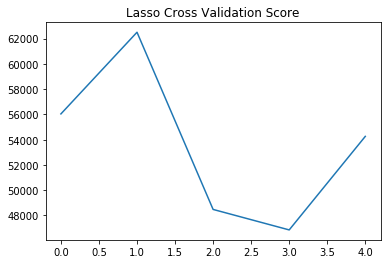

In [121]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =1000))
score = rmsle_cv(lasso)
print('Lasso Score Mean',(score.mean()), 'Lasso Score Standard Deviation',(score.std()))

plt.title('Lasso Cross Validation Score')
plt.plot(score)
plt.show()